In [1]:
import pandas as pd        
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # USed for drawing Box plot
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [195]:
df_main = pd.read_excel("C:/Yerawars/Harshad/ML/DataSets/Imarticus_Hackathon/Participants_Data_Used_Cars/Data_Train.xlsx",sheet_name="Sheet1")

In [196]:
#Adding a new column to 
df_main_new = df_main.copy(deep=True)

In [72]:
df_main_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
Name                 6019 non-null object
CarBrand             6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage_Num          6019 non-null object
Mileage              6017 non-null object
Engine_CC            6019 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Power_BHP            6019 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(13)
memory usage: 799.5+ KB


# Base Set of Functions called from entire program set

In [200]:
def getDataFrameInformation(df):
    return df.info()

def getDataFrameShape(df):
    return df.shape

def paintPairPlots(df):
    sns.pairplot(df)
    
def separatingFirstWordFromVariable(variabletoSplit):
    DFLength = len(df_main)
    SplitWordArray=[]
    for i in range(DFLength):
        if(pd.isnull(df_main[variabletoSplit][i])):
            #print("Harshad",i,df_main[variabletoSplit][i] )
            if type(variabletoSplit) == float:
                SplitWordArray.append(0.0)
            if type(variabletoSplit) == str:
                #print("Harshad inside string if null")
                SplitWordArray.append("0")
            if type(variabletoSplit) == int:
                SplitWordArray.append(0)
        else:
            #print("Harshad inside if value is present")
            FirstWordSplit = df_main[variabletoSplit][i].split()[0]
            if(FirstWordSplit=="null"):
                #print("Harshad inside if value is string null")
                SplitWordArray.append("0")
            else:
                SplitWordArray.append(FirstWordSplit)

        
    return SplitWordArray

def getUniqueValuesofIV(var):
    return df_main_new[var].unique()

def PaintBarPlotThruSeaBorn(var1,var2):
    sns.set(style="whitegrid")
    ax = sns.barplot(x=var1,y=var2,data=df_main_new)
    
def setNewType(df,var,newDataType):
    df[var].astype(newDataType)

def paintFacetGridPlotting (col,row, plotDiagram, variabletoplot):
    g = sns.FacetGrid(df_main_new, col=col , row=row)
    g.map(plotDiagram,variabletoplot)

C:\Users\hyerawar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hyerawar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


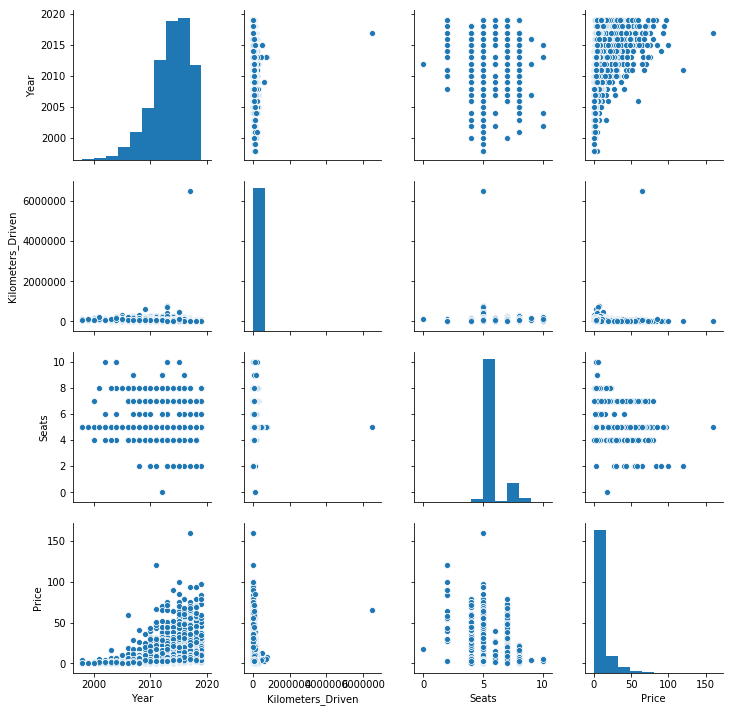

In [9]:
paintPairPlots(df_main)

In [ ]:
# Some Observations
# As year increases prices of the car increases
# No Relationship between Year and Seats and Km driven
# As Km Driven is less or on zero the price is high but has Km driven increases price decreases.
# No relations between Km Driven and Year
# Car-PriceCars with all types of seating arrangement have prices in all range
# No Relation between seats and Km driven
# Cars of all seating arrangement is present in all years
# Price Relations (DV)
    # Seat (Third influential variable with the DV)
        # 4, 5, 7 seater cars have maximum concentration in price range from low to high
        # 2 seater car are lesser
    # Km Driven (This might be the second most influential variable)
        # Lower Km car driven have prices in from low to high
        # Higher driven Km car are very less and if present they have prices very low
    # Make Year (Has Most influential on DV variable price)
        # Older the make lower is the price
        # Latest is the make price increases 

# Feature Engineering of splitting the first value of variables

In [197]:
# Feature Engineering
# first subset Name from the entire Name 
# Make the Engine Make, Power and Mileage integer object and then do pair plotting with Price to see relationship
# For Name

firstNameList = separatingFirstWordFromVariable("Name")
df_main_new.insert(1,"CarBrand",firstNameList)

EnginePowerList = separatingFirstWordFromVariable("Engine")
df_main_new.insert(9,"Engine_CC",EnginePowerList)
setNewType(df_main_new,"Engine_CC",float)

MileageNumList = separatingFirstWordFromVariable("Mileage")
df_main_new.insert(8,"Mileage_Num",EnginePowerList)
setNewType(df_main_new,"Mileage_Num",float)


PowerNumList = separatingFirstWordFromVariable("Power")
#len(PowerNumList)

df_main_new.insert(13,"Power_BHP",PowerNumList)
setNewType(df_main_new,"Power_BHP",float)

In [198]:
df_main_new.to_csv("C:/Yerawars/Harshad/ML/DataSets/Imarticus_Hackathon/Participants_Data_Used_Cars/NewDataFrame.csv")

In [193]:
getDataFrameInformation(df_main_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
Name                 6019 non-null object
CarBrand             6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage_Num          6019 non-null object
Mileage              6017 non-null object
Engine_CC            6019 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Power_BHP            6019 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(13)
memory usage: 799.5+ KB


#  Plotting various variables from the new data frame

In [ ]:
# Draw plots between Transmission and Price (Bar plotting)
# Draw plots between Owner Type and Price (Bar plotting)
# Scatter plot between Mileage and Price
# Scatter plot between Engine cap and Price
# Scatter plot between Power and Price
# Bar plot between Location and Price
# Bar plotting between car brand and price by categories (deduce another variable)